In [35]:
import cv2

In [36]:
import numpy as np

In [37]:
import matplotlib.pyplot as plt 

In [38]:
import tensorflow as tf

In [39]:
mnist = tf.keras.datasets.mnist

In [40]:
(x_train,y_train), (x_test,y_test) = mnist.load_data()

In [41]:
x_train = tf.keras.utils.normalize(x_train,axis=1)
x_test = tf.keras.utils.normalize(x_test,axis=1)

In [42]:
model = tf.keras.models.Sequential()

In [43]:
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))

In [44]:
model.add(tf.keras.layers.Dense(200,activation='sigmoid'))

In [45]:
model.add(tf.keras.layers.Dense(200,activation='sigmoid'))

In [46]:
model.add(tf.keras.layers.Dense(100,activation='sigmoid'))

In [47]:
model.add(tf.keras.layers.Dense(10,activation='softmax'))

In [48]:
model.compile(optimizer='adam',loss="sparse_categorical_crossentropy",metrics=['accuracy'])

In [49]:
model.fit(x_train,y_train,epochs=7)
model.save("handwritten.model")

Epoch 1/7
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5366 - accuracy: 0.8424
Epoch 2/7
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2153 - accuracy: 0.9355
Epoch 3/7
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1564 - accuracy: 0.9532
Epoch 4/7
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1228 - accuracy: 0.9630
Epoch 5/7
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0987 - accuracy: 0.9701
Epoch 6/7
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0818 - accuracy: 0.9754
Epoch 7/7
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0680 - accuracy: 0.9796
INFO:tensorflow:Assets written to: handwritten.model\assets


In [50]:
model = tf.keras.models.load_model("handwritten.model")

In [53]:
loss,accuracy = model.evaluate(x_test,y_test)


313/313 [==============================] - 1s 2ms/step - loss: 0.0970 - accuracy: 0.9702


In [54]:
print(loss,accuracy)

0.09698960185050964 0.9702000021934509


In [67]:
TestImage = cv2.imread("img1.png")[:,:,0]
print(TestImage)

[[255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0   0   0 255 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255   0   0   0   0   0   0   0   0   0   0   0   0 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  255 255 255 255 255 255 255 255 255 255]
 [255 255   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255   0   0   0   0   0 255 255 255 255 255   0   0   0   0   0
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255   0   0   0   0
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255   0   0   0   0
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255   0   

In [68]:
TestImage = np.invert(np.array([TestImage]))
print(TestImage)

[[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0 255 255 255 255 255 255 255 255   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0 255 255 255 255 255 255 255 255 255 255 255 255   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0 255 255 255 255 255 255 255 255 255 255 255 255 255 255
   255   0   0   0   0   0   0   0   0   0   0]
  [  0   0 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
   255   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0 255 255 255 255 255   0   0   0   0   0 255 255 255 255
   255   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 255 255 255
   255   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 255 255 255
   255   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0  

This digit is probably  2


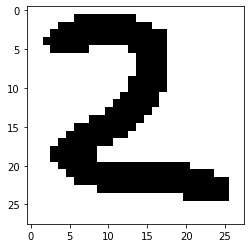

In [69]:
prediction = model.predict(TestImage)
print("This digit is probably ",np.argmax(prediction))
plt.imshow(TestImage[0],cmap=plt.cm.binary)
plt.show()